<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 5

## Help Yelp

---

In this project you will be investigating a small version of the [Yelp challenge dataset](https://www.yelp.com/dataset_challenge). You'll practice using classification algorithms, cross-validation, gridsearching – all that good stuff.



---

### The data

There are 5 individual .csv files that have the information, zipped into .7z format like with the SF data last project. The dataset is located in your datasets folder:

    DSI-SF-2/datasets/yelp_arizona_data.7z

The columns in each are:

    businesses_small_parsed.csv
        business_id: unique business identifier
        name: name of the business
        review_count: number of reviews per business
        city: city business resides in
        stars: average rating
        categories: categories the business falls into (can be one or multiple)
        latitude
        longitude
        neighborhoods: neighborhoods business belongs to
        variable: "property" of the business (a tag)
        value: True/False for the property
        
    reviews_small_nlp_parsed.csv
        user_id: unique user identifier
        review_id: unique review identifier
        votes.cool: how many thought the review was "cool"
        business_id: unique business id the review is for
        votes.funny: how many thought the review was funny
        stars: rating given
        date: date of review
        votes.useful: how many thought the review was useful
        ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review
        
    users_small_parsed.csv
        yelping_since: signup date
        compliments.plain: # of compliments "plain"
        review_count: # of reviews:
        compliments.cute: total # of compliments "cute"
        compliments.writer: # of compliments "writer"
        compliments.note: # of compliments "note" (not sure what this is)
        compliments.hot: # of compliments "hot" (?)
        compliments.cool: # of compliments "cool"
        compliments.profile: # of compliments "profile"
        average_stars: average rating
        compliments.more: # of compliments "more"
        elite: years considered "elite"
        name: user's name
        user_id: unique user id
        votes.cool: # of votes "cool"
        compliments.list: # of compliments "list"
        votes.funny: # of compliments "funny"
        compliments.photos: # of compliments "photos"
        compliments.funny: # of compliments "funny"
        votes.useful: # of votes "useful"
       
    checkins_small_parsed.csv
        business_id: unique business identifier
        variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
        value: # of checkins at that time
    
    tips_small_nlp_parsed.csv
        user_id: unique user identifier
        business_id: unique business identifier
        likes: likes that the tip has
        date: date of tip
        ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. I'm not sure whether the compliments or votes are _by_ the user or _for_ the user.

---

If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

    Phoenix
    Surprise
    Las Vegas
    Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because I thought the mix of them was funny:

    Airports
    Breakfast & Brunch
    Bubble Tea
    Burgers
    Bars
    Bakeries
    Breweries
    Cafes
    Candy Stores
    Comedy Clubs
    Courthouses
    Dance Clubs
    Fast Food
    Museums
    Tattoo
    Vape Shops
    Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
businesses = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/yelp_arizona_data/businesses_small_parsed.csv')
reviews = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/yelp_arizona_data/reviews_small_nlp_parsed.csv')
users = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/yelp_arizona_data/users_small_parsed.csv')
checkins = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/yelp_arizona_data/checkins_small_parsed.csv')
tips = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/yelp_arizona_data/tips_small_nlp_parsed.csv')

print "businesses:", businesses.shape
print "reviews:", reviews.shape
print "users:", users.shape
print "checkins:", checkins.shape
print "tips:", tips.shape

businesses: (152832, 11)
reviews: (322398, 108)
users: (144206, 21)
checkins: (214299, 3)
tips: (101991, 104)


In [3]:
# print businesses['city'].value_counts()
# businesses.head()

In [4]:
# reviews.columns.values

In [5]:
# users.head()

In [6]:
# checkins.head()

In [7]:
# tips.columns.values

In [8]:
businesses = businesses.drop(['latitude', 'longitude', 'neighborhoods'], axis=1)

In [9]:
# businesses.head()

In [10]:
# UNUSED businesses.groupby('business_id', as_index=False).aggregate(lambda x: list(set(x)))

In [11]:
df_wide = pd.pivot_table(businesses, 
                        columns=['variable'],
                        values='value',
                        index=['business_id'],
                        aggfunc=lambda x: [][0] if len(x.values) > 1 else x.values[0],
                        fill_value=np.nan)

In [12]:
print df_wide.shape
df_wide.head()

(4132, 78)


variable,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,attributes.Ambience.hipster,attributes.Ambience.intimate,attributes.Ambience.romantic,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
business_id,,,,,,,,,,,,,,,,,,,,,
--jFTZmywe7StuZ2hEjxyA,True,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
-0HGqwlfw3I8nkJyMHxAsQ,True,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
-0VK5Z1BfUHUYq4PoBYNLw,True,NaN,NaN,full_bar,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
-0bUDim5OGuv8R0Qqq6J4A,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
-1bOb2izeJBZjHC7NWxiPA,True,NaN,NaN,none,True,False,False,False,False,False,...,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,True


In [13]:
businesses_wide = businesses.drop(['variable', 'value'], axis=1)

In [14]:
businesses_wide = businesses_wide.groupby('business_id', as_index=False).aggregate(lambda x: x.values[0])

In [15]:
businesses_wide.head()

,business_id,name,review_count,city,stars,categories
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']"
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.0,"['Burgers', 'Fast Food', 'Restaurants']"
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,Las Vegas,3.5,"['Bars', 'Nightlife', 'Lounges']"
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,Phoenix,2.0,"['Bakeries', 'Food', 'Breakfast & Brunch', 'Re..."
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,Phoenix,4.0,"['Breakfast & Brunch', 'Cafes', 'American (Tra..."


In [16]:
def widen_categories(row):
    categories = row['categories'].replace('[', '').replace(']', '').replace("'", '').split(', ')
    for x in categories:
        row[x] = True
    return row

categories_df = businesses_wide.apply(widen_categories, axis=1).iloc[:, :-5]
businesses_wide = businesses_wide.merge(categories_df, how='inner', on='business_id')

In [17]:
businesses_wide = businesses_wide.drop('categories', axis=1)

In [18]:
print businesses_wide.shape

(4132, 219)


In [19]:
print df_wide.shape

(4132, 78)


In [20]:
businesses_merged = businesses_wide.merge(df_wide, left_on='business_id', right_index=True)

In [21]:
print businesses_merged.shape

(4132, 297)


In [22]:
# Percent not null in each column
percent_not_null = (businesses_merged.shape[0] - businesses_merged.isnull().sum()) / 4132.0 * 100
businesses_less_nulls = businesses_merged.drop(businesses_merged[percent_not_null[percent_not_null < 10].index], axis=1)

In [23]:
print businesses_less_nulls.shape
businesses_less_nulls.head()

(4132, 73)


,business_id,name,review_count,city,stars,American (Traditional),Bars,Burgers,Fast Food,Food,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,3.5,NaN,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.0,NaN,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,Las Vegas,3.5,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,Phoenix,2.0,NaN,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,Phoenix,4.0,True,NaN,NaN,NaN,NaN,...,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,True


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

In [183]:
businesses_lvprofile = businesses_less_nulls.copy()
businesses_lvprofile['city'] = businesses_less_nulls['city'].apply(lambda x: 1 if x == 'Las Vegas' else 0)
businesses_lvprofile.columns = [col_name.lower().replace(' ', '_').replace('.', '_').replace('(', '').replace(')', '').replace('-', '_') for col_name in businesses_lvprofile.columns]

In [184]:
df = businesses_lvprofile[businesses_lvprofile.columns.difference(['business_id'])].copy()
df = df.fillna('NA')

pd.options.display.max_columns = 100
df.head()

,american_traditional,attributes_accepts_credit_cards,attributes_alcohol,attributes_ambience_casual,attributes_ambience_classy,attributes_ambience_divey,attributes_ambience_hipster,attributes_ambience_intimate,attributes_ambience_romantic,attributes_ambience_touristy,attributes_ambience_trendy,attributes_ambience_upscale,attributes_attire,attributes_caters,attributes_coat_check,attributes_delivery,attributes_drive_thru,attributes_good_for_breakfast,attributes_good_for_brunch,attributes_good_for_dancing,attributes_good_for_dessert,attributes_good_for_dinner,attributes_good_for_groups,attributes_good_for_kids,attributes_good_for_latenight,attributes_good_for_lunch,attributes_happy_hour,attributes_has_tv,attributes_music_dj,attributes_music_jukebox,attributes_music_karaoke,attributes_music_live,attributes_music_video,attributes_noise_level,attributes_outdoor_seating,attributes_parking_garage,attributes_parking_lot,attributes_parking_street,attributes_parking_valet,attributes_parking_validated,attributes_price_range,attributes_smoking,attributes_take_out,attributes_takes_reservations,attributes_waiter_service,attributes_wheelchair_accessible,attributes_wi_fi,bars,burgers,city,fast_food,food,hours_friday_close,hours_friday_open,hours_monday_close,hours_monday_open,hours_saturday_close,hours_saturday_open,hours_sunday_close,hours_sunday_open,hours_thursday_close,hours_thursday_open,hours_tuesday_close,hours_tuesday_open,hours_wednesday_close,hours_wednesday_open,name,nightlife,open,restaurants,review_count,stars
0,NA,True,none,NA,NA,NA,NA,NA,NA,NA,NA,NA,casual,NA,NA,False,False,True,False,NA,False,False,True,True,False,False,NA,False,NA,NA,NA,NA,NA,NA,True,NA,NA,NA,NA,NA,1.0,NA,True,False,NA,NA,NA,NA,NA,1,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,Subway,NA,True,True,7,3.5
1,NA,True,none,NA,NA,NA,NA,NA,NA,NA,NA,NA,casual,False,NA,False,True,False,False,NA,False,False,True,True,False,False,NA,True,NA,NA,NA,NA,NA,quiet,False,False,False,False,False,False,1.0,NA,True,False,False,NA,free,NA,True,0,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,McDonald's,NA,True,True,9,3.0
2,NA,True,full_bar,True,False,False,False,False,False,False,False,False,NA,NA,False,NA,NA,NA,NA,True,NA,NA,True,NA,NA,NA,True,False,NA,NA,NA,False,NA,loud,False,False,False,False,False,False,2.0,yes,NA,NA,NA,NA,NA,True,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,T Spot,True,True,NA,5,3.5
3,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,casual,NA,NA,False,NA,False,False,NA,False,False,True,True,False,False,NA,NA,NA,NA,NA,NA,NA,NA,False,False,False,False,False,False,1.0,NA,True,False,True,True,NA,NA,NA,0,NA,True,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,IHOP,NA,False,True,8,2.0
4,True,True,none,True,False,False,False,False,False,False,False,False,casual,True,NA,False,NA,True,False,NA,False,False,True,True,False,False,NA,False,NA,NA,NA,NA,NA,average,False,False,True,False,False,False,1.0,NA,True,False,True,True,free,NA,NA,0,NA,NA,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,First Watch,NA,True,True,120,4.0


In [185]:
import patsy

df = df.drop(df.iloc[:, -20:-6].columns, axis=1) # Drop hours columns
# all_columns = "C(" + ") + C(".join(df.columns.difference(['city', 'review_count'])) + ") + (review_count)"
all_columns = "C(" + ") + C(".join(df.columns.difference(['city', 'review_count', 'name'])) + ") + (review_count)"
formula = "city ~ " + all_columns + " - 1"
# formula = "city ~ attributes_smoking - 1"
print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

city ~ C(american_traditional) + C(attributes_accepts_credit_cards) + C(attributes_alcohol) + C(attributes_ambience_casual) + C(attributes_ambience_classy) + C(attributes_ambience_divey) + C(attributes_ambience_hipster) + C(attributes_ambience_intimate) + C(attributes_ambience_romantic) + C(attributes_ambience_touristy) + C(attributes_ambience_trendy) + C(attributes_ambience_upscale) + C(attributes_attire) + C(attributes_caters) + C(attributes_coat_check) + C(attributes_delivery) + C(attributes_drive_thru) + C(attributes_good_for_breakfast) + C(attributes_good_for_brunch) + C(attributes_good_for_dancing) + C(attributes_good_for_dessert) + C(attributes_good_for_dinner) + C(attributes_good_for_groups) + C(attributes_good_for_kids) + C(attributes_good_for_latenight) + C(attributes_good_for_lunch) + C(attributes_happy_hour) + C(attributes_has_tv) + C(attributes_music_dj) + C(attributes_music_jukebox) + C(attributes_music_karaoke) + C(attributes_music_live) + C(attributes_music_video) + C(a

In [186]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(3305, 125) (3305,)
(827, 125) (827,)


In [187]:
# from sklearn.grid_search import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt
# # plt.style.use('seaborn-white')
# %matplotlib inline

# lr_params = {
#     'penalty':['l1','l2'],
#     'solver':['liblinear'],
#     'C':np.logspace(1e-4, 1e4, 40)
# }

# # import warnings
# # warnings.filterwarnings('ignore', message='Changing the shape of non-C contiguous array')

# logreg = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=2, n_jobs=1)

# model = logreg.fit(X_train, y_train)
# probabilities = model.predict_proba(X_test)
# score = model.score(X_test, y_test)
# print 'Model Score: ', score



In [188]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

logreg = LogisticRegressionCV(cv=5, n_jobs=1, verbose=1)

model = logreg.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)
score = model.score(X_test, y_test)
print 'Model Score: ', score

Model Score:  0.706166868198


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.0s finished


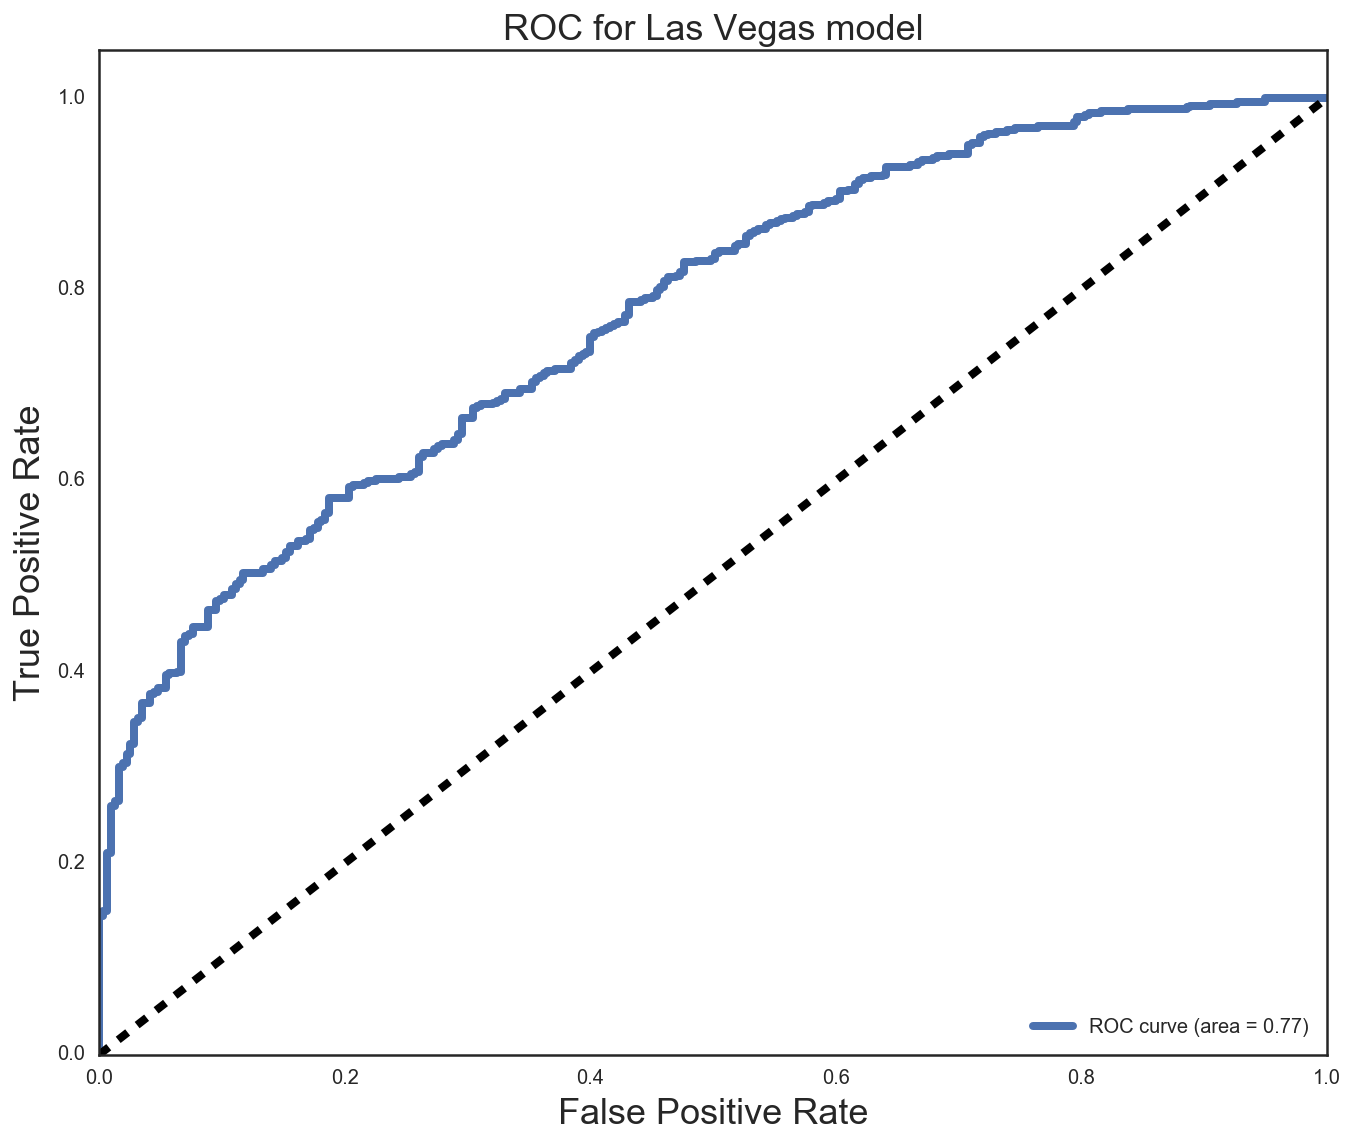

In [189]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()

FPR[1], TPR[1], _ = roc_curve(y_test, probabilities[:, 1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

plt.figure(figsize=[11,9])
# Plot false and true rates (returned from roc_curve function)
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
# Plot a dotted line diagonally, representing the .5
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Las Vegas model', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [190]:
summary = pd.DataFrame(zip(model.coef_[0], X_train.columns))
summary.sort_values(0, ascending=False).head(10)

,0,1
91,2.398057,C(attributes_smoking)[T.yes]
76,1.340010,C(attributes_parking_garage)[T.True]
48,0.685286,C(attributes_good_for_groups)[T.True]
40,0.486564,C(attributes_good_for_brunch)[T.True]
86,0.443394,C(attributes_price_range)[T.3.0]
47,0.433738,C(attributes_good_for_groups)[T.NA]
66,0.404485,C(attributes_music_live)[T.True]
21,0.397037,C(attributes_ambience_touristy)[T.True]
102,0.378488,C(attributes_wi_fi)[T.paid]
26,0.372431,C(attributes_attire)[T.casual]


In [191]:
summary.sort_values(0, ascending=True).head(10)

,0,1
90,-1.652857,C(attributes_smoking)[T.outdoor]
84,-1.132166,C(attributes_parking_validated)[T.True]
74,-0.876593,C(attributes_outdoor_seating)[T.True]
12,-0.753623,C(attributes_ambience_divey)[T.NA]
23,-0.594023,C(attributes_ambience_trendy)[T.True]
89,-0.568029,C(attributes_smoking)[T.no]
70,-0.523110,C(attributes_noise_level)[T.loud]
62,-0.520198,C(attributes_music_jukebox)[T.True]
80,-0.511094,C(attributes_parking_street)[T.True]
41,-0.497146,C(attributes_good_for_dancing)[T.NA]


In [173]:
businesses_less_nulls[businesses_less_nulls['attributes.Smoking'] == "yes"]['city'].value_counts()

Las Vegas    499
Phoenix        7
Waterloo       3
Surprise       1
Name: city, dtype: int64

In [34]:
# businesses_less_nulls[businesses_less_nulls['attributes.Smoking'] == "outdoor"]['city'].value_counts()

In [35]:
# businesses_less_nulls[businesses_less_nulls['attributes.Smoking'] == "no"]['city'].value_counts()

In [36]:
# businesses_less_nulls[businesses_less_nulls['attributes.Parking.garage'] == "True"]['city'].value_counts()

In [37]:
# businesses_less_nulls[businesses_less_nulls['attributes.Parking.validated'] == "True"]['city'].value_counts()

# KNN

Did not end up using this model since it generated inferior results for the features I found relevant,
and it does not provide much useful information for generating a profile.

In [38]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xn_train = ss.fit_transform(X_train)
Xn_test = ss.fit_transform(X_test)

In [39]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params = {
    'n_neighbors':range(6,30),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn, params, cv=5, verbose=1, n_jobs=-1)
knn_gs.fit(Xn_train, y_train)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.8s


{'n_neighbors': 26, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   20.2s finished


In [40]:
best_knn.fit(Xn_train, y_train)
best_knn.score(Xn_test, y_test)

0.66868198307134219




# Las Vegas Profile:

If you could only choose 2 ways to predict whether a business is in Las Vegas or not, you should choose 
smoking and parking.
Las Vegas businesses are far more likely to allow smoking, and thus unlikely to say no to smoking or restrict 
it to the outdoors. Businesses in Las Vegas are also disproportionately likely to have a parking garage, and not nearly as likely to offer street parking.

Las Vegas also has more high-priced businesses and fewer divey destinations. Unsurprisingly, businesses there
are also touristy and better for groups, though they tend to not be so good for dancing to a jukebox...


.


.


.


.


.


.


.


.


.


.


.


.


.


.


.

In [41]:
# print reviews.info()
# print reviews.columns.values
# reviews.head()

In [42]:
# print tips.info()
# print tips.columns.values
# tips.head()

In [43]:
# users.head()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

# Question 1

Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.

In [44]:
# reviews.columns

In [45]:
# print """user_id', 'review_id', ... , 'wait staff""".replace('\n', '').split("' '")

In [46]:
reviews_service_cols = ['bottle service', 
                        'customer service', 
                        'food came', 
                        'food service', 
                        'friendly staff', 
                        'good service', 
                        'great service', 
                        'service excellent', 
                        'service food', 
                        'service friendly', 
                        'service good', 
                        'service great', 
                        'staff friendly', 
                        'super friendly', 
                        'wait staff']

In [47]:
reviews_service = reviews[['user_id', 'business_id', 'review_id', 'stars'] + reviews_service_cols]
reviews_service.columns

Index([u'user_id', u'business_id', u'review_id', u'stars', u'bottle service',
       u'customer service', u'food came', u'food service', u'friendly staff',
       u'good service', u'great service', u'service excellent',
       u'service food', u'service friendly', u'service good', u'service great',
       u'staff friendly', u'super friendly', u'wait staff'],
      dtype='object')

In [48]:
reviews_not_service_cols = reviews.columns.difference(list(reviews_service_cols) + ['votes.cool', 'votes.funny', 'date', 'votes.useful']).values
reviews_not_service = reviews[reviews_not_service_cols]
reviews_not_service.columns

Index([u'10 minutes', u'15 minutes', u'20 minutes', u'30 minutes', u'bar food',
       u'beer selection', u'best ve', u'bloody mary', u'business_id',
       u'chicken waffles', u'dance floor', u'decided try', u'definitely come',
       u'definitely recommend', u'didn want', u'don know', u'don like',
       u'don think', u'don want', u'eggs benedict', u'fast food', u'feel like',
       u'felt like', u'fish chips', u'food amazing', u'food delicious',
       u'food good', u'food great', u'food just', u'french fries',
       u'french toast', u'friday night', u'fried chicken', u'good food',
       u'good place', u'good thing', u'good time', u'great atmosphere',
       u'great experience', u'great food', u'great place', u'great time',
       u'happy hour', u'hash browns', u'highly recommend', u'hip hop',
       u'ice cream', u'just like', u'just ok', u'just right', u'las vegas',
       u'late night', u'like place', u'little bit', u'long time',
       u'looked like', u'looks like', u'love pla

In [49]:
tips_service_cols = ['awesome service', 
                     'bottle service', 
                     'customer service', 
                     'excellent service', 
                     'fast service', 
                     'food service', 
                     'friendly service', 
                     'friendly staff', 
                     'good service', 
                     'great service', 
                     'great staff', 
                     'service food', 
                     'service good', 
                     'service great', 
                     'slow service', 
                     'staff friendly',  
                     'super friendly']

In [50]:
tips_service = tips[['user_id', 'business_id'] + tips_service_cols]
tips_service.columns

Index([u'user_id', u'business_id', u'awesome service', u'bottle service',
       u'customer service', u'excellent service', u'fast service',
       u'food service', u'friendly service', u'friendly staff',
       u'good service', u'great service', u'great staff', u'service food',
       u'service good', u'service great', u'slow service', u'staff friendly',
       u'super friendly'],
      dtype='object')

In [51]:
tips_not_service_cols = tips.columns.difference(list(tips_service_cols) + ['date', 'likes']).values
tips_not_service = tips[tips_not_service_cols]
tips_not_service.columns

Index([u'24 hours', u'amazing food', u'animal style', u'awesome food',
       u'awesome place', u'beef hash', u'beer selection', u'best breakfast',
       u'best burger', u'best burgers', u'best place', u'bloody mary',
       u'business_id', u'carne asada', u'cheese fries', u'chicken waffles',
       u'come early', u'cool place', u'corned beef', u'delicious food',
       u'don come', u'don forget', u'eggs benedict', u'excellent food',
       u'fast food', u'favorite place', u'feel like', u'fish chips',
       u'food amazing', u'food awesome', u'food drinks', u'food good',
       u'food great', u'free wifi', u'french toast', u'fried chicken',
       u'gluten free', u'good food', u'good place', u'great atmosphere',
       u'great beer', u'great breakfast', u'great burgers', u'great customer',
       u'great drinks', u'great food', u'great happy', u'great place',
       u'great prices', u'great spot', u'grilled cheese', u'guest list',
       u'happy birthday', u'happy hour', u'highly reco

In [52]:
ratios = pd.DataFrame(index=users['user_id'].values)
ratios.head()

""
rpOyqD_893cqmDAtJLbdog
4U9kSBLuBDU391x6bxU-YA
SIBCL7HBkrP4llolm4SC2A
UTS9XcT14H2ZscRIf0MYHQ
ZWOj6LmzwGvMDh-A85EOtA


In [53]:
# Reset column order for reviews_not_service
pd.options.mode.chained_assignment = None

df = reviews_not_service.drop(['user_id', 'business_id', 'review_id', 'stars'], axis=1)
reviews_not_service.drop(reviews_not_service.columns.difference(
        ['user_id', 'business_id', 'review_id', 'stars']), inplace=True, axis=1)
reviews_not_service = pd.concat([reviews_not_service, df], axis=1)
reviews_not_service.columns

Index([u'business_id', u'review_id', u'stars', u'user_id', u'10 minutes',
       u'15 minutes', u'20 minutes', u'30 minutes', u'bar food',
       u'beer selection', u'best ve', u'bloody mary', u'chicken waffles',
       u'dance floor', u'decided try', u'definitely come',
       u'definitely recommend', u'didn want', u'don know', u'don like',
       u'don think', u'don want', u'eggs benedict', u'fast food', u'feel like',
       u'felt like', u'fish chips', u'food amazing', u'food delicious',
       u'food good', u'food great', u'food just', u'french fries',
       u'french toast', u'friday night', u'fried chicken', u'good food',
       u'good place', u'good thing', u'good time', u'great atmosphere',
       u'great experience', u'great food', u'great place', u'great time',
       u'happy hour', u'hash browns', u'highly recommend', u'hip hop',
       u'ice cream', u'just like', u'just ok', u'just right', u'las vegas',
       u'late night', u'like place', u'little bit', u'long time',
     

In [54]:
# Reset column order for tips_not_service
df = tips_not_service.drop(['user_id', 'business_id'], axis=1)
tips_not_service.drop(tips_not_service.columns.difference(
        ['user_id', 'business_id']), inplace=True, axis=1)
tips_not_service = pd.concat([tips_not_service, df], axis=1)

pd.options.mode.chained_assignment = 'warn'

tips_not_service.columns

Index([u'business_id', u'user_id', u'24 hours', u'amazing food',
       u'animal style', u'awesome food', u'awesome place', u'beef hash',
       u'beer selection', u'best breakfast', u'best burger', u'best burgers',
       u'best place', u'bloody mary', u'carne asada', u'cheese fries',
       u'chicken waffles', u'come early', u'cool place', u'corned beef',
       u'delicious food', u'don come', u'don forget', u'eggs benedict',
       u'excellent food', u'fast food', u'favorite place', u'feel like',
       u'fish chips', u'food amazing', u'food awesome', u'food drinks',
       u'food good', u'food great', u'free wifi', u'french toast',
       u'fried chicken', u'gluten free', u'good food', u'good place',
       u'great atmosphere', u'great beer', u'great breakfast',
       u'great burgers', u'great customer', u'great drinks', u'great food',
       u'great happy', u'great place', u'great prices', u'great spot',
       u'grilled cheese', u'guest list', u'happy birthday', u'happy hour',
 

In [55]:
# Get sums for calculating ratio of service-related reviews/tips
def fill_ratio_values(row, col_name, df_type):
    if df_type == 'reviews': 
        ratios.loc[row['user_id'], col_name] = sum(row[4:])
    else:
        ratios.loc[row['user_id'], col_name] = sum(row[2:])

In [56]:
# Takes a few minutes to finish

print "Filling ratio values..."
reviews_service.apply(fill_ratio_values, args=('reviews_service', 'reviews'), axis=1)
print "Column 1 of 4 complete"
reviews_not_service.apply(fill_ratio_values, args=('reviews_not_service', 'reviews'), axis=1)
print "Column 2 of 4 complete"
tips_service.apply(fill_ratio_values, args=('tips_service', 'tips'), axis=1)
print "Column 3 of 4 complete"
tips_not_service.apply(fill_ratio_values, args=('tips_not_service', 'tips'), axis=1)
print "Column 4 of 4 complete"

Filling ratio values...
Column 1 of 4 complete
Column 2 of 4 complete
Column 3 of 4 complete
Column 4 of 4 complete


In [57]:
ratios.head()

,reviews_service,reviews_not_service,tips_service,tips_not_service
rpOyqD_893cqmDAtJLbdog,0.0,1.0,0.0,0.0
4U9kSBLuBDU391x6bxU-YA,1.0,2.0,0.0,0.0
SIBCL7HBkrP4llolm4SC2A,0.0,0.0,NaN,NaN
UTS9XcT14H2ZscRIf0MYHQ,2.0,5.0,0.0,0.0
ZWOj6LmzwGvMDh-A85EOtA,0.0,2.0,0.0,0.0


In [58]:
ratios_calculated = ratios

ratios_calculated['service_related_ratio'] = ratios_calculated.apply(
    lambda row: (row['reviews_service'] + row['tips_service']) / np.sum(row)
, axis=1)

In [59]:
ratios_results = ratios['service_related_ratio'].dropna()

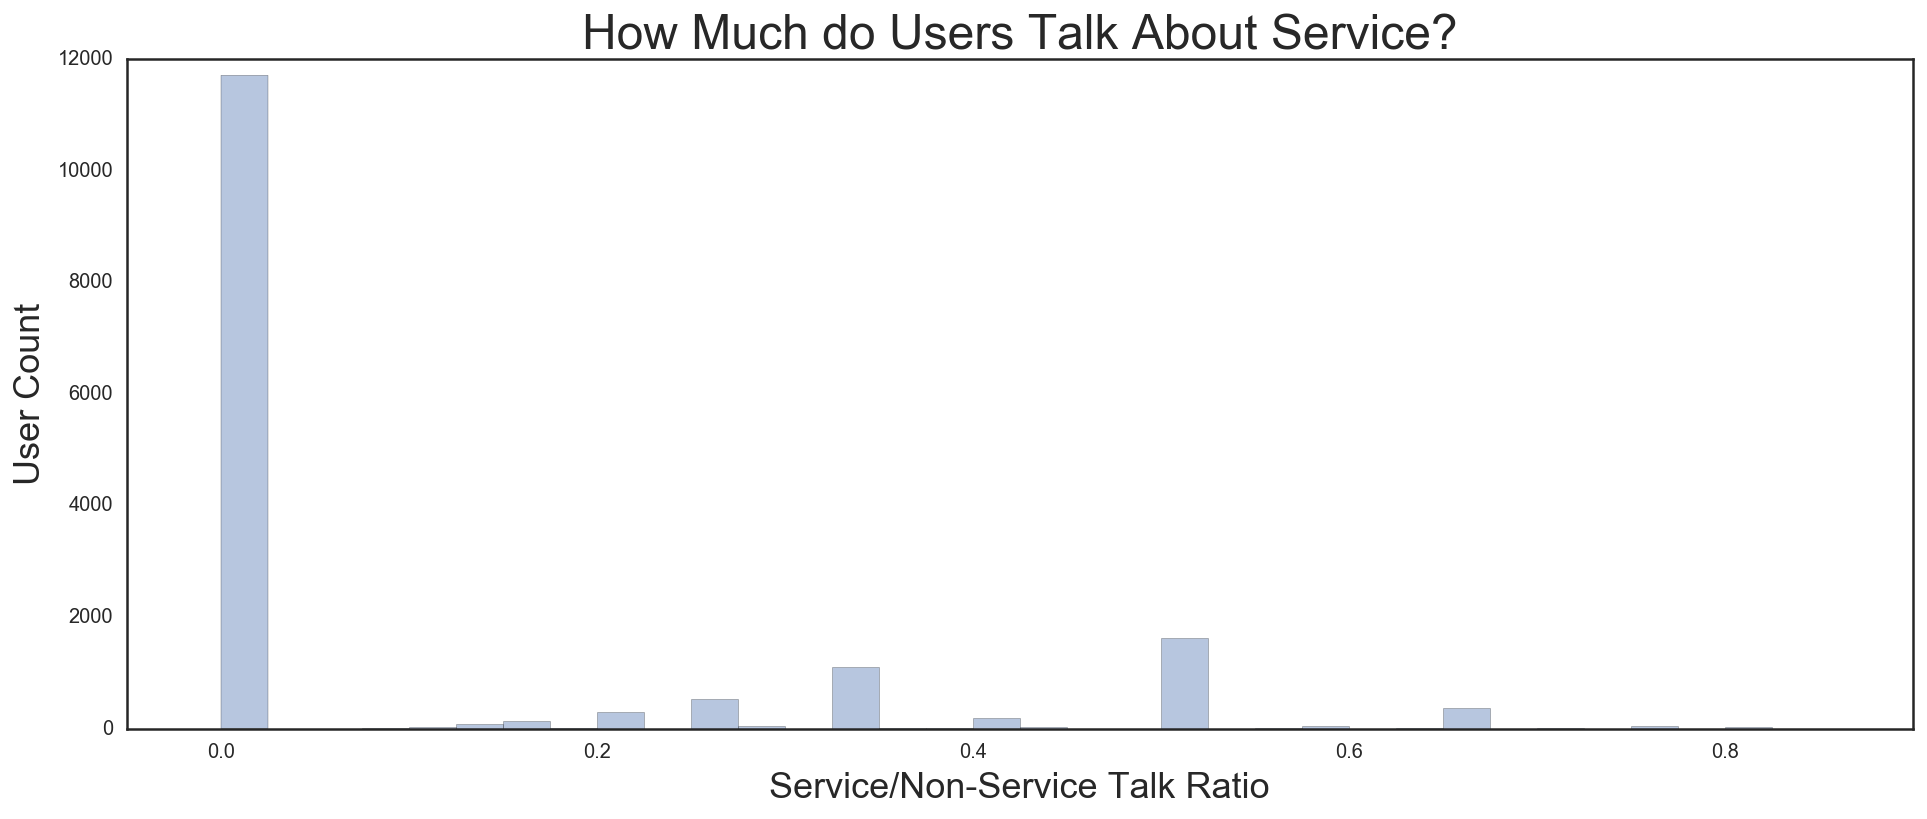

In [60]:
import seaborn as sns
plt.style.use('seaborn-white')
plt.figure(figsize=[16,6])

plt.xlim([-0.05, 0.9])

plt.xlabel('', fontsize=18)
plt.ylabel('User Count', fontsize=18)
plt.title("How Much do Users Talk About Service?", fontsize=24)
    
sns.distplot(ratios_results, axlabel='Service/Non-Service Talk Ratio', kde=False)

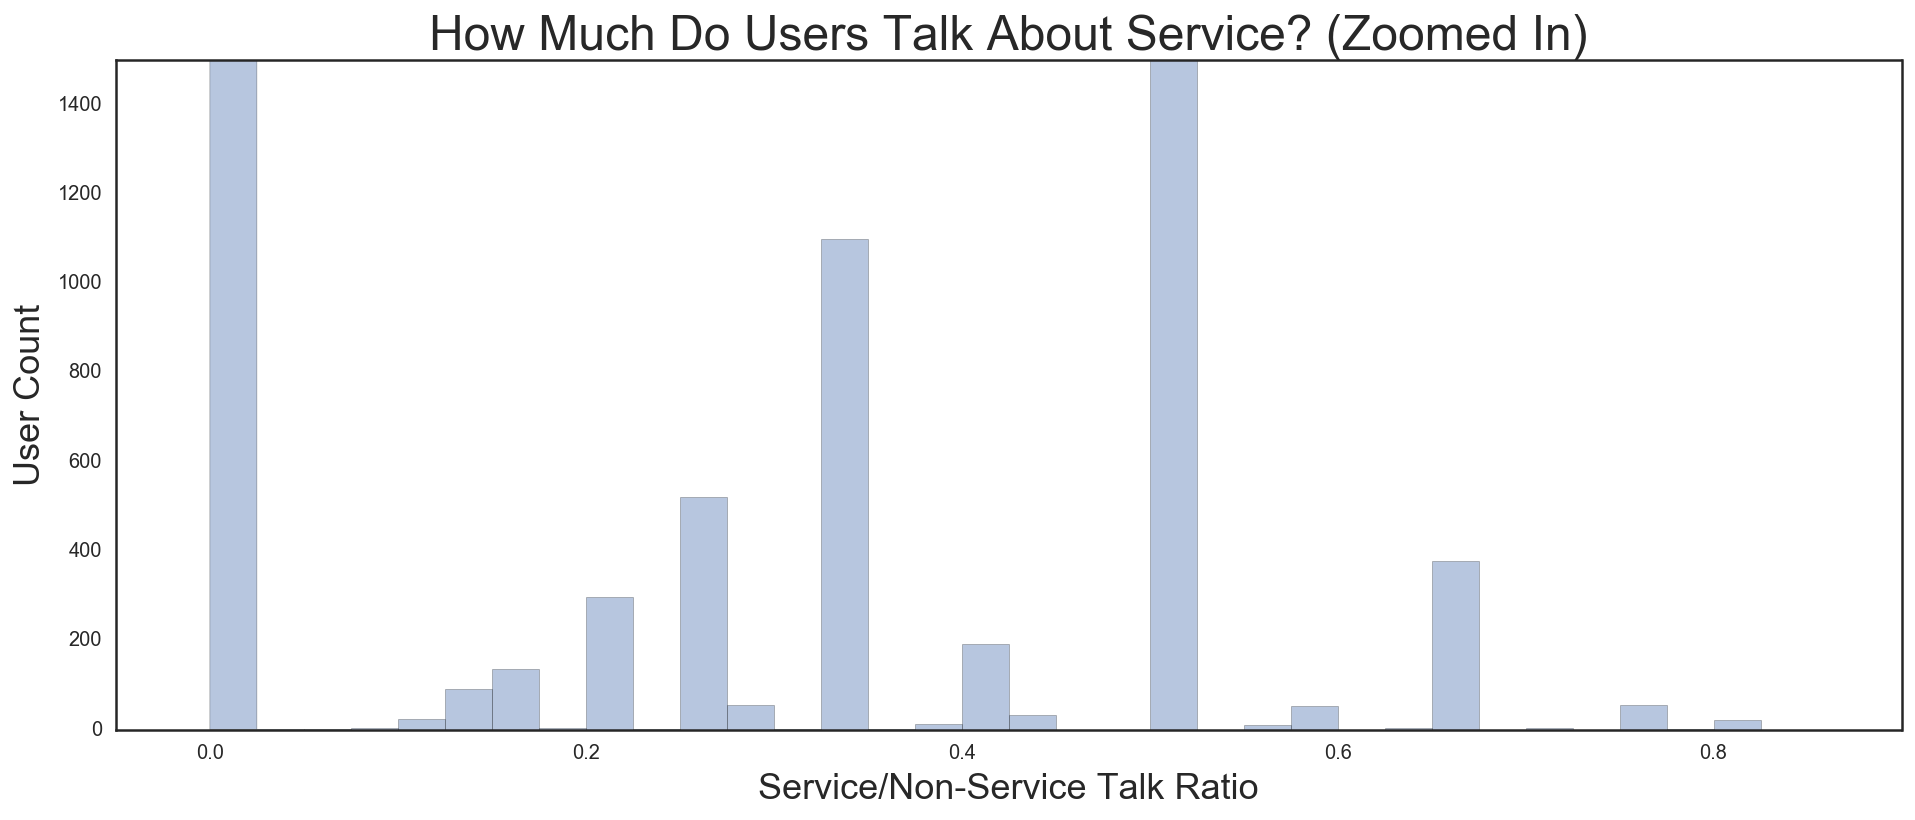

In [61]:
plt.figure(figsize=[16,6])

plt.xlim([-0.05, 0.9])
plt.ylim([0.0, 1500])

plt.xlabel('', fontsize=18)
plt.ylabel('User Count', fontsize=18)
plt.title("How Much Do Users Talk About Service? (Zoomed In)", fontsize=24)
    
sns.distplot(ratios_results, axlabel='Service/Non-Service Talk Ratio', kde=False)

In [62]:
print ratios_results.describe(), "\n"
print "Percent of reviewers who focused more on service:"
print str(np.round((float((ratios_results > .5).value_counts()[1]) / (ratios_results > .5).value_counts()[0] * 100), 2)) + "%"

count    17903.000000
mean         0.192870
std          0.315047
min          0.000000
25%          0.000000
50%          0.000000
75%          0.333333
max          1.000000
Name: service_related_ratio, dtype: float64 

Percent of reviewers who focused more on service:
13.34%


.


.


.


.


.


.


.


.


.


.

In [63]:
# users_tips_service = users.merge(tips_service, on='user_id')

In [64]:
# print users.shape
# print tips_service.shape
# print users_tips_service.shape

In [65]:
# users_tips_not_service = users.merge(tips_not_service, on='user_id')

In [66]:
# print users.shape
# print tips_not_service.shape
# print users_tips_not_service.shape

# Question 2

Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.

In [67]:
# users_reviews_service = users.merge(reviews_service, on='user_id')

In [68]:
# print users.shape
# print reviews_service.shape
# print users_reviews_service.shape

In [69]:
# users_reviews_not_service = users.merge(reviews_not_service, on='user_id')

In [70]:
# print users.shape
# print reviews_not_service.shape
# print users_reviews_not_service.shape

In [71]:
reviews_service_cols_new = list(reviews_service.iloc[:, 4:].columns)
reviews_not_service_cols_new = list(reviews_not_service.iloc[:, 4:].columns)

In [72]:
def get_service_ratings(row):
    if np.sum(row[reviews_service_cols_new]) > np.sum(row[reviews_not_service_cols_new]):
        row['stars_service'] = row['stars']
    else:
        row['stars_not_service'] = row['stars']
    return row

In [73]:
# Takes several minutes to run

reviews_stars = reviews.apply(get_service_ratings, axis=1)

In [74]:
reviews_stars.tail()[['review_id', 'stars_service', 'stars_not_service']]

,review_id,stars_service,stars_not_service
322393,AZj9ywomKPU2amrQ4Dgdgw,NaN,5.0
322394,pc64h8WmcsLmOhZJ0d42cA,NaN,5.0
322395,VNK6dKKgpKf5aTy_Pb5qOA,5.0,NaN
322396,BdXe5zknM0P5qUmj815icg,NaN,5.0
322397,pbeNXaVsBAo72GmII2A0oA,NaN,5.0


In [75]:
mean_ratings = pd.DataFrame(reviews_stars.groupby('business_id').mean())[['stars_service', 'stars_not_service']]
business_stars = businesses_less_nulls.merge(mean_ratings, how='left', left_on='business_id', right_index=True)
business_stars.drop(business_stars.columns[4:-2], axis=1, inplace=True)

In [76]:
business_stars.head()

,business_id,name,review_count,city,stars_service,stars_not_service
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,NaN,3.400000
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.5,2.857143
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,Las Vegas,NaN,3.750000
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,Phoenix,NaN,2.142857
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,Phoenix,4.4,3.908046


.


.


.


.


.


.


.


.


.


.

# Question 3

Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice).

In [109]:
print business_stars.shape
business_stars.head()

(4132, 6)


,business_id,name,review_count,city,stars_service,stars_not_service
0,--jFTZmywe7StuZ2hEjxyA,Subway,7,Las Vegas,NaN,3.400000
1,-0HGqwlfw3I8nkJyMHxAsQ,McDonald's,9,Phoenix,3.5,2.857143
2,-0VK5Z1BfUHUYq4PoBYNLw,T Spot,5,Las Vegas,NaN,3.750000
3,-0bUDim5OGuv8R0Qqq6J4A,IHOP,8,Phoenix,NaN,2.142857
4,-1bOb2izeJBZjHC7NWxiPA,First Watch,120,Phoenix,4.4,3.908046


In [110]:
import patsy

df = business_stars.copy()
formula = "stars_not_service ~ review_count + C(city) - 1"

print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

stars_not_service ~ review_count + C(city) - 1
(4130, 5)
(4130, 1)


In [111]:
xy = X.copy()
xy['stars'] = y
xy.corr()

,C(city)[Las Vegas],C(city)[Phoenix],C(city)[Surprise],C(city)[Waterloo],review_count,stars
C(city)[Las Vegas],1.000000,-0.924144,-0.176823,-0.172084,0.080482,0.006563
C(city)[Phoenix],-0.924144,1.000000,-0.099292,-0.096631,-0.061746,0.012211
C(city)[Surprise],-0.176823,-0.099292,1.000000,-0.018489,-0.030079,-0.069948
C(city)[Waterloo],-0.172084,-0.096631,-0.018489,1.000000,-0.043044,0.003705
review_count,0.080482,-0.061746,-0.030079,-0.043044,1.000000,0.119490
stars,0.006563,0.012211,-0.069948,0.003705,0.119490,1.000000


In [112]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

Xn = ss.fit_transform(X)

In [113]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(Xn, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(3304, 5) (3304,)
(826, 5) (826,)


In [114]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

optimal_elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=500, cv=5, verbose=1, n_jobs=1)
model = optimal_elastic.fit(X_train, y_train)
# model = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio=optimal_elastic.l1_ratio_).fit(X_train, y_train)

print "Optimal alpha:", optimal_elastic.alpha_
print "Optimal L1 ratio:", optimal_elastic.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha: 0.0149493530889
Optimal L1 ratio: 1.0


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [115]:
pd.DataFrame(zip(model.coef_, X.columns))

,0,1
0,-0.000000,C(city)[Las Vegas]
1,0.000000,C(city)[Phoenix]
2,-0.044953,C(city)[Surprise]
3,0.000000,C(city)[Waterloo]
4,0.079136,review_count


Model Score: 0.0206081291951


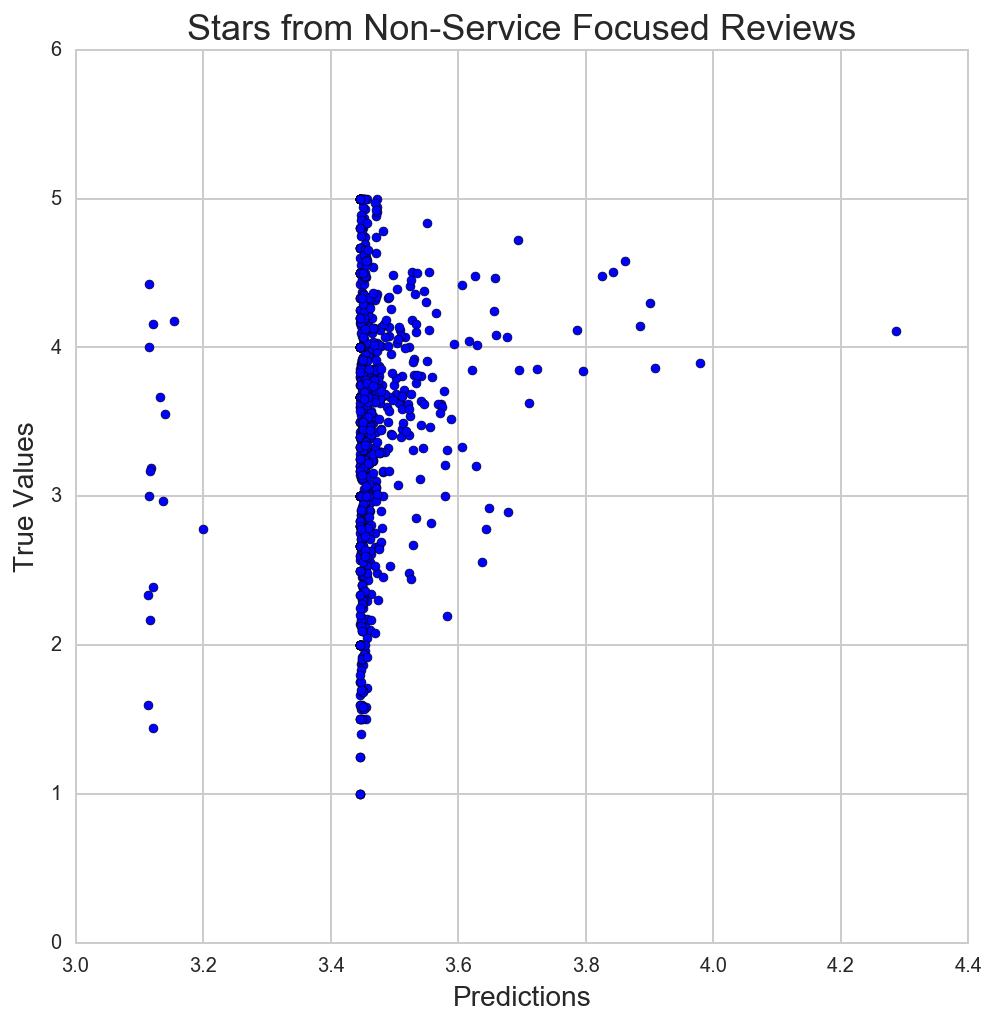

In [116]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[8,8])

plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.title("Stars from Non-Service Focused Reviews", fontsize=18)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

plt.scatter(predictions, y_test)
print 'Model Score:', score

In [441]:
df = business_stars.copy()
formula = "stars_service ~ review_count + C(city) - 1"

print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

stars_service ~ review_count + C(city) - 1
(2862, 5)
(2862, 1)


In [406]:
ss = StandardScaler()

Xn = ss.fit_transform(X)

In [407]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(Xn, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(2289, 5) (2289,)
(573, 5) (573,)


In [408]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

optimal_elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=500, cv=5, verbose=1, n_jobs=1)
model = optimal_elastic.fit(X_train, y_train)
# model = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio=optimal_elastic.l1_ratio_).fit(X_train, y_train)

print "Optimal alpha:", optimal_elastic.alpha_
print "Optimal L1 ratio:", optimal_elastic.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha: 0.0151513437574
Optimal L1 ratio: 1.0


...................................................................................................................................................................[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.7s finished


In [409]:
pd.DataFrame(zip(model.coef_, X.columns))

,0,1
0,-0.000000,C(city)[Las Vegas]
1,0.016412,C(city)[Phoenix]
2,-0.000000,C(city)[Surprise]
3,0.000000,C(city)[Waterloo]
4,0.043159,review_count


Model Score: -0.000457123206828


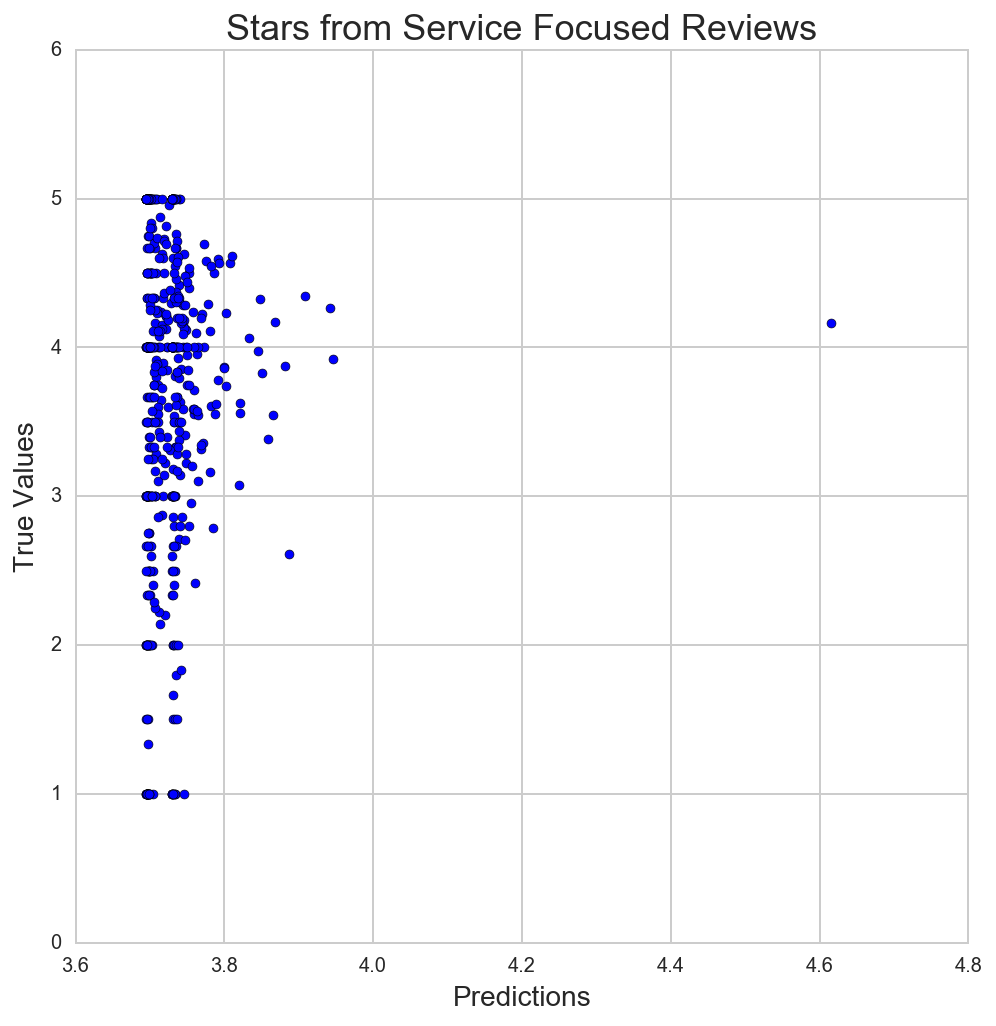

In [410]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[8,8])

plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.title("Stars from Service Focused Reviews", fontsize=18)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

plt.scatter(predictions, y_test)
print 'Model Score:', score

# Question 4

Validate the performance of the models.

In [ ]:
# Already cross-validated

# Question 5

Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [ ]:
# The coefficients barely differ. Although there may indeed be "two different kinds of ratings", 
# city and review count of a business do not seem to be predictable with either of them.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [236]:
users.head().T

,0,1,2,3,4
yelping_since,2004-10,2004-10,2004-10,2004-10,2004-10
compliments.plain,959,89,2,5,104
review_count,1274,442,66,101,983
compliments.cute,206,23,2,1,82
compliments.writer,327,24,2,3,17
fans,1179,100,4,7,78
compliments.note,611,83,1,3,85
compliments.hot,1094,101,1,5,265
compliments.cool,1642,145,1,4,212
compliments.profile,116,9,NaN,1,9


In [448]:
users_elite = users.copy()

users_elite['elite_binary'] = users_elite['elite'].apply(lambda x: 0 if x == '[]' else 1)
# users_elite.head()

In [470]:
df = users_elite.copy()
df.columns = [col_name.replace('.', '_') for col_name in df.columns]

# all_columns = "" + " + ".join(df.columns.difference(['user_id', 'name', 'yelping_since', 'elite', 'elite_binary']))
# formula = "elite_binary ~ " + all_columns + " - 1"
formula = 'elite_binary ~ review_count - 1'
print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

elite_binary ~ review_count - 1
(144206, 1)
(144206, 1)


In [471]:
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(115364, 1) (115364,)
(28842, 1) (28842,)


In [472]:
logreg = LogisticRegressionCV(cv=5, n_jobs=1, verbose=1, max_iter=1000)

model = logreg.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)
score = model.score(X_test, y_test)
print 'Model Score: ', score
# print 'Baseline Model:', np.mean(y_test)

Model Score:  0.936724221621


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.5s finished


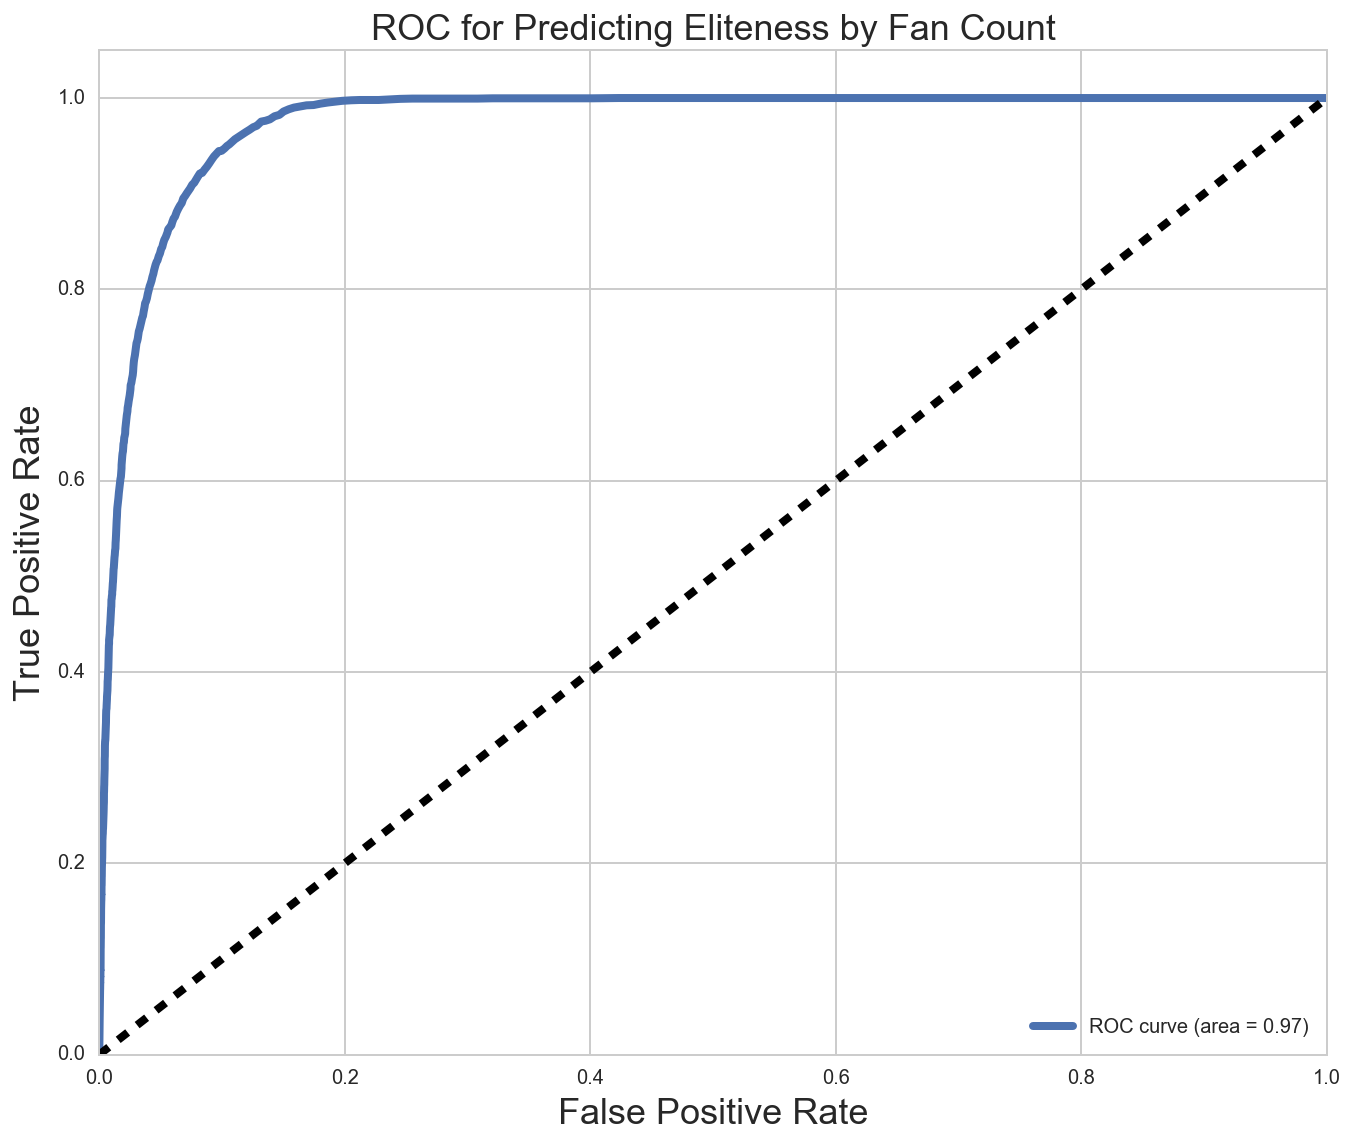

In [473]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()

FPR[1], TPR[1], _ = roc_curve(y_test, probabilities[:, 1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

plt.figure(figsize=[11,9])
# Plot false and true rates (returned from roc_curve function)
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
# Plot a dotted line diagonally, representing the .5
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Predicting Eliteness by Fan Count', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [474]:
summary = pd.DataFrame(zip(model.coef_[0], X_train.columns))
summary.sort_values(0)

,0,1
0,0.022814,review_count


In [475]:
# After running a few formulas, I found that review count is an insanely good predictor of elite status.

.


.


.


.


.


.

In [450]:
join_dates = pd.to_datetime(df['yelping_since'])
df['days_yelping'] = (pd.to_datetime('2016-08') - join_dates).astype('timedelta64[D]')
df.head(1)

,yelping_since,compliments_plain,review_count,compliments_cute,compliments_writer,fans,compliments_note,compliments_hot,compliments_cool,compliments_profile,average_stars,compliments_more,elite,name,user_id,votes_cool,compliments_list,votes_funny,compliments_photos,compliments_funny,votes_useful,elite_binary,days_yelping
0,2004-10,959.0,1274,206.0,327.0,1179,611.0,1094.0,1642.0,116.0,3.66,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199,1,4322.0


In [454]:
# xy = df.copy()
# # xy['stars'] = y

# correlations = xy.corr()

# # Generate a mask for the upper triangle (taken from seaborn example gallery)
# mask = np.zeros_like(correlations, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# fig = plt.figure(figsize=(10,10))
# ax = fig.gca()

# ax = sns.heatmap(correlations, mask=mask)

In [455]:
formula = 'elite_binary ~ days_yelping - 1'
print formula

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')
print X.shape
print y.shape

elite_binary ~ days_yelping - 1
(144206, 1)
(144206, 1)


In [456]:
y = np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(115364, 1) (115364,)
(28842, 1) (28842,)


In [457]:
logreg = LogisticRegressionCV(cv=5, n_jobs=1, verbose=1, max_iter=100)

model = logreg.fit(X_train, y_train)
probabilities = model.predict_proba(X_test)
score = model.score(X_test, y_test)
print 'Model Score: ', score
# print 'Baseline Model:', np.mean(y_test)

Model Score:  0.887733166909


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


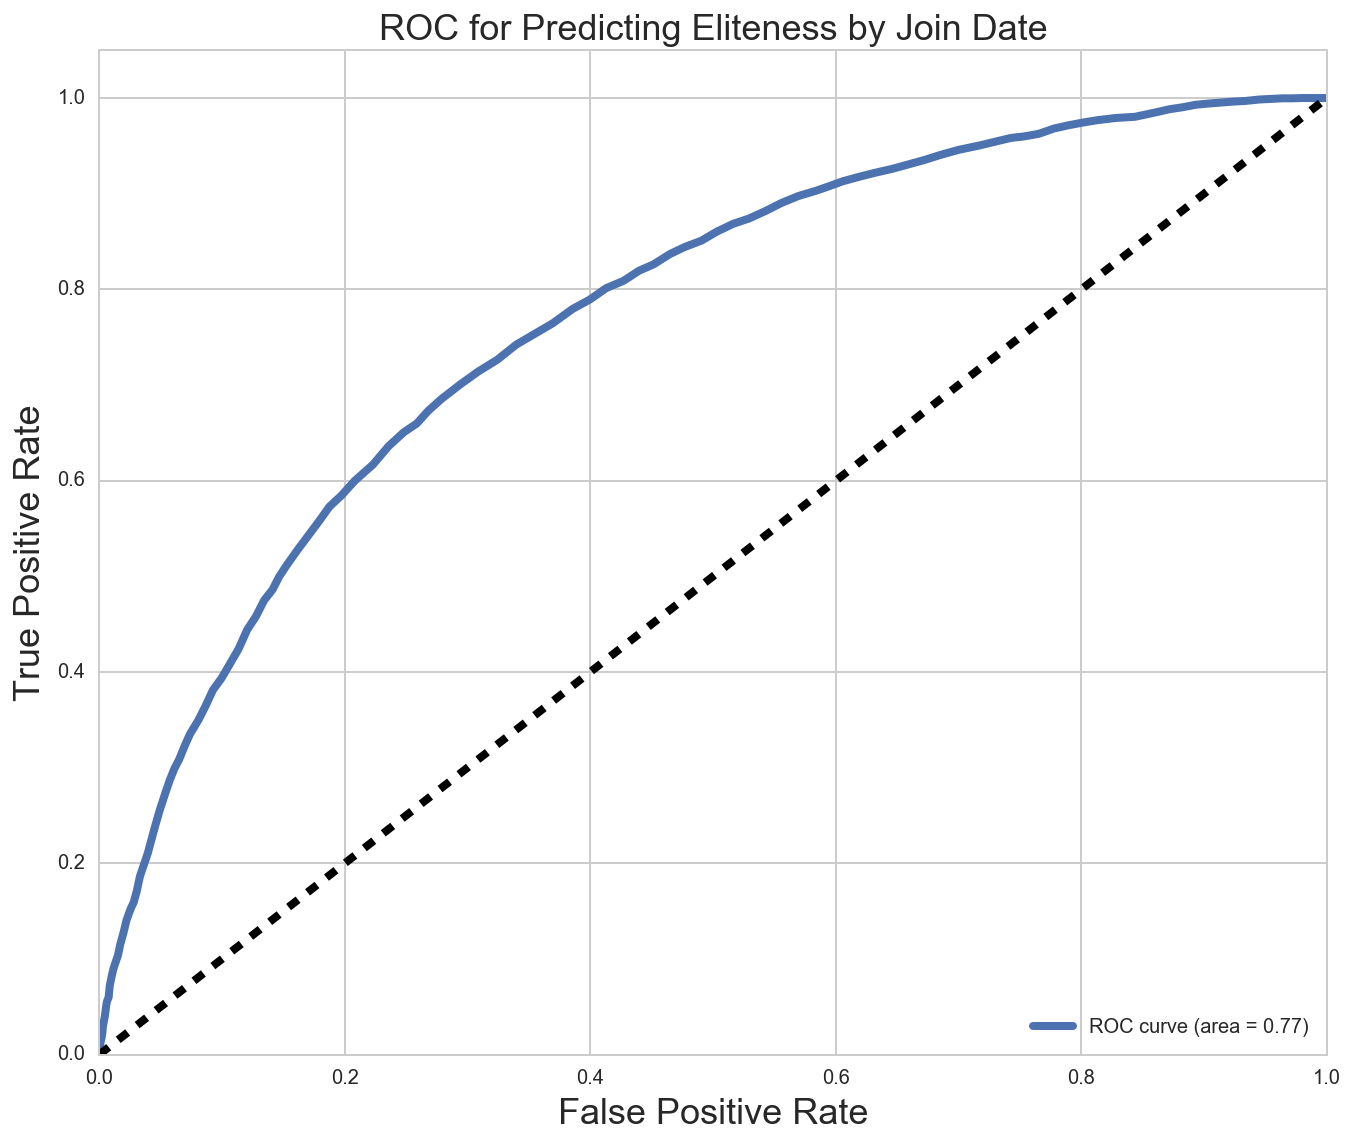

In [458]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()

FPR[1], TPR[1], _ = roc_curve(y_test, probabilities[:, 1])
ROC_AUC[1] = auc(FPR[1], TPR[1])

plt.figure(figsize=[11,9])
# Plot false and true rates (returned from roc_curve function)
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
# Plot a dotted line diagonally, representing the .5
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC for Predicting Eliteness by Join Date', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [459]:
# Yelp join date is a solid, "non-counted" predictor of eliteness

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?